In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Data/train.csv")


In [3]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Drop any rows with missing values in the 'Age' column
df.dropna(subset=['Age'], inplace=True)


In [5]:
# Drop any rows with missing values in the 'Survived' column
df.dropna(subset=['Survived'], inplace=True)


In [6]:

# Fill missing values in the 'Age' column with the mean age
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [7]:
# Fill missing values in the 'Cabin' column with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)


EDA

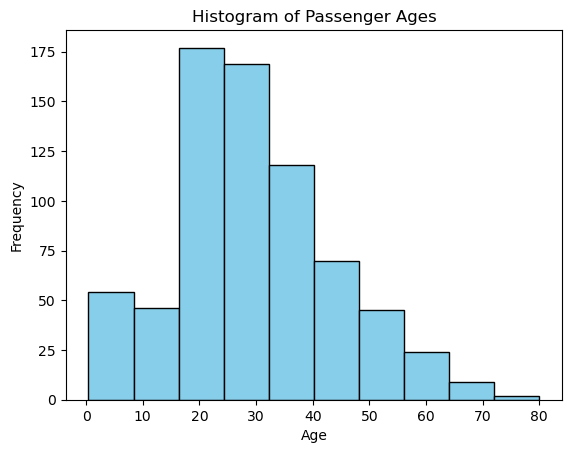

In [8]:
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Passenger Ages')
plt.show()

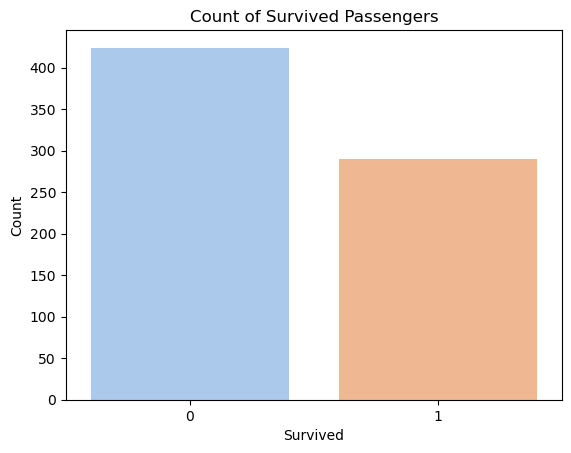

In [9]:
sns.countplot(x='Survived', data=df, palette='pastel')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of Survived Passengers')
plt.show()

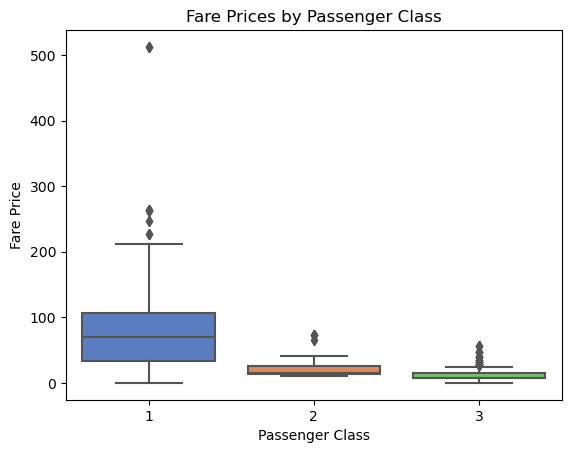

In [10]:
sns.boxplot(x='Pclass', y='Fare', data=df, palette='muted')
plt.xlabel('Passenger Class')
plt.ylabel('Fare Price')
plt.title('Fare Prices by Passenger Class')
plt.show()

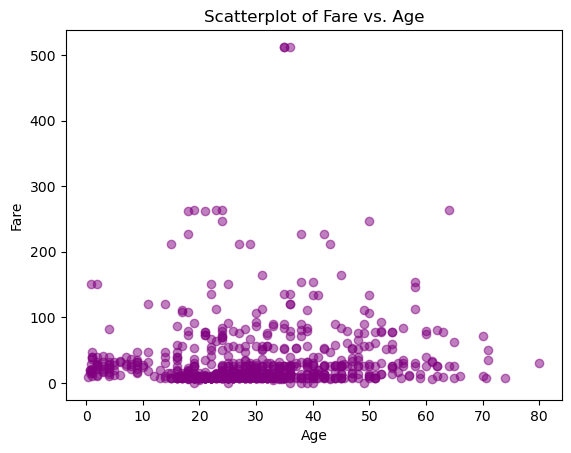

In [11]:
plt.scatter(df['Age'], df['Fare'], color='purple', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatterplot of Fare vs. Age')
plt.show()

Feature Engineering 

In [12]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch']


In [13]:
# Extract titles from 'Name' and create a new feature 'Title'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [14]:
# Map titles to more common categories
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 1, "Countess": 2, "Ms": 1, "Lady": 2, "Jonkheer": 4, "Don": 4, "Dona": 2, "Mme": 2, "Capt": 4, "Sir": 4}
df['Title'] = df['Title'].map(title_mapping)

In [15]:
# Create a new feature 'IsAlone' based on 'FamilySize'
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


In [16]:
# Convert 'Sex' feature to a numerical representation
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [17]:
# Drop unnecessary columns after feature engineering
df.drop(['Name', 'SibSp', 'Parch'], axis=1, inplace=True)

EDA on New Features 

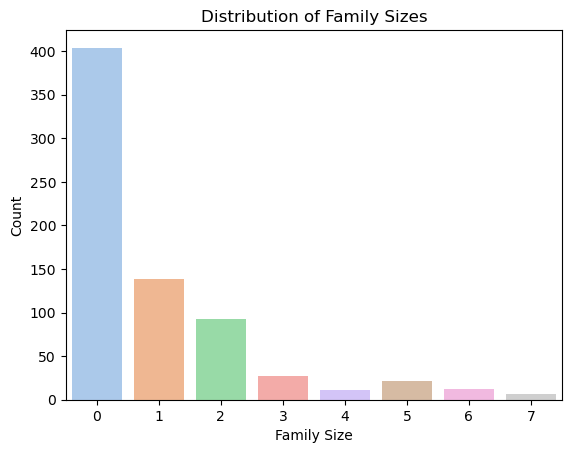

In [18]:
sns.countplot(x='FamilySize', data=df, palette='pastel')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Distribution of Family Sizes')
plt.show()

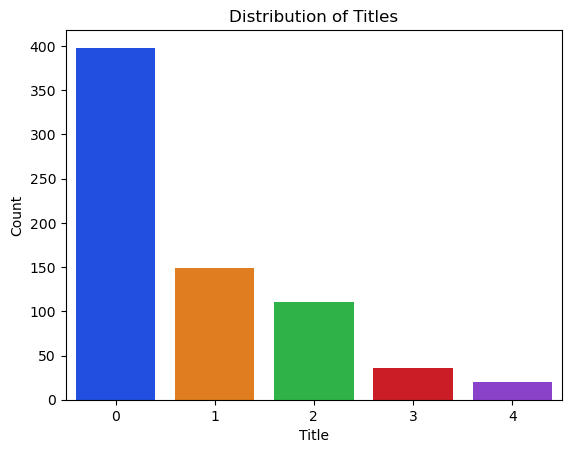

In [19]:
sns.countplot(x='Title', data=df, palette='bright')
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Distribution of Titles')
plt.show()

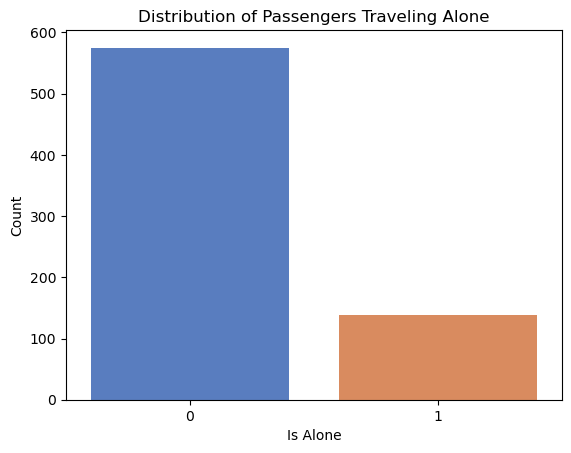

In [20]:
sns.countplot(x='IsAlone', data=df, palette='muted')
plt.xlabel('Is Alone')
plt.ylabel('Count')
plt.title('Distribution of Passengers Traveling Alone')
plt.show()

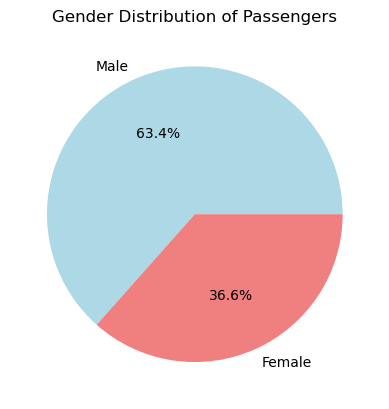

In [21]:
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution of Passengers')
plt.show()

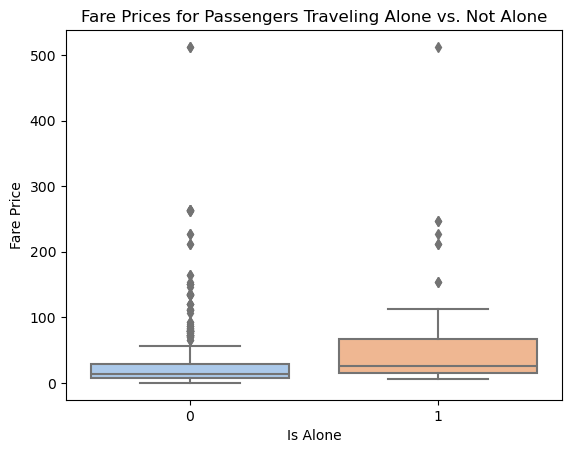

In [22]:
sns.boxplot(x='IsAlone', y='Fare', data=df, palette='pastel')
plt.xlabel('Is Alone')
plt.ylabel('Fare Price')
plt.title('Fare Prices for Passengers Traveling Alone vs. Not Alone')
plt.show()

In [24]:
# Save the updated DataFrame to a new CSV file
df.to_csv("../Data/engineered_train_data.csv", index=False)

Machine Language 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
# Load the train and test datasets
train_data = pd.read_csv("../Data/engineered_train_data.csv")
test_data = pd.read_csv("../Data/test.csv")

In [27]:
# Define features and target variable
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Title', 'IsAlone']
X = train_data[features]
y = train_data['Survived']


In [28]:
# Split the data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val)

In [31]:
# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on validation set:", accuracy)


Accuracy on validation set: 0.7902097902097902


In [33]:
# Feature engineering on the test dataset
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Title'].map(title_mapping)
test_data['IsAlone'] = 0
test_data.loc[test_data['FamilySize'] == 1, 'IsAlone'] = 1
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})


In [34]:
# Select features for prediction
X_test = test_data[features]

In [36]:
from sklearn.impute import SimpleImputer

# Impute missing values in the test dataset
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

In [37]:
# Make predictions on the test set
predictions = rf_classifier.predict(X_test_imputed)

c:\Users\huawei\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
# Create a submission file
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
submission.to_csv("../Data/titanic_submission.csv", index=False)